# Homework1:Image Classification

檔名請按照命名格式:711xxxxxxx(您的學號)_hw1.ipynb

1.導入MNIST資料集並視覺化5個樣本和對應的Label（10分）

train data=  60000
test data= 10000


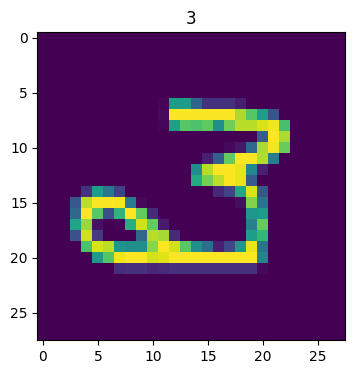

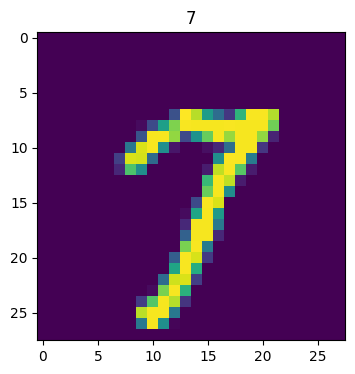

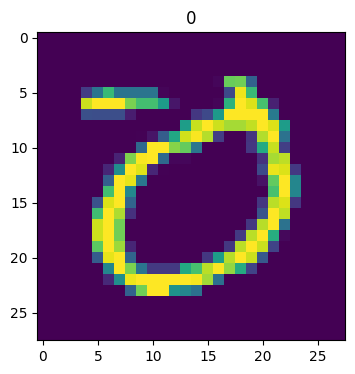

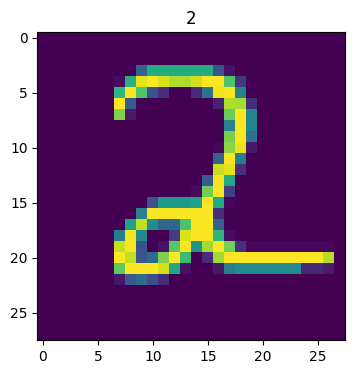

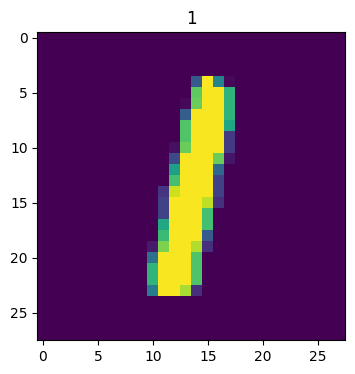

In [25]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical # Use to_categorical instead of np_utils
np.random.seed(10)

# 匯入資料
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()
print('train data= ',len(x_train_image))
print('test data=', len(x_test_image))
CLASS_NAME = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

from matplotlib import pyplot as plt

def imshow(title, image = None, size = 5):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(image)
      plt.title(title)
      plt.show()
    else:
      print("Image not found")


# 隨機顯示五張圖片
for i in range(0,5):
    random_num = np.random.randint(0, len(x_train_image))
    img = x_train_image[random_num]
    imshow(CLASS_NAME[y_train_label[random_num]], img, size = 4)

2.資料預處理並把資料劃分成訓練集和測試集（10分）

將數據轉成一維且進行標準化:

In [26]:
# 影像資料--------------------------------------
# 代表 train image 總共有6萬張，每一張是28*28的圖片
# label 也有6萬個
# 所以要把二維的圖片矩陣先轉換成一維
# 這裡的784是因為 28*28
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')


# 由於是圖片最大的是255，所以全部除以255
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255


將Label進行one-hot編碼:

In [27]:
from tensorflow.keras.utils import to_categorical

# 標註資料--------------------------------------
y_TrainOneHot = to_categorical(y_train_label)
y_TestOneHot = to_categorical(y_test_label)

印出訓練集與測試集的shape:

In [28]:
# 顯示資料集的形狀
print("Initial shape or dimensions of x_train", str(x_train_image.shape))
print("Initial shape or dimensions of x_test", str(x_test_image.shape))
print("Initial shape or dimensions of y_train", str(y_train_label.shape))
print("Initial shape or dimensions of y_test", str(y_test_label.shape))
print('\n')

Initial shape or dimensions of x_train (60000, 28, 28)
Initial shape or dimensions of x_test (10000, 28, 28)
Initial shape or dimensions of y_train (60000,)
Initial shape or dimensions of y_test (10000,)




3.構建至少兩層隱藏層的ANN（10分）

建立神經網絡:

In [29]:
from keras.models import Sequential
from keras.layers import Dense

# 建立模型
model = Sequential()

# 第一層隱藏層
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
# 隱藏層：256個神經元，輸入維度為784，激活函數為 ReLU

# 第二層隱藏層
model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
# 隱藏層：128個神經元，激活函數為 ReLU

# 第三層隱藏層
model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
# 隱藏層：64個神經元，激活函數為 ReLU

# 輸出層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
# 輸出層：10個神經元，softmax 用於多分類輸出


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


印出模型的架構:

In [30]:
print(model.summary())

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,762 (948.29 KB)

 Trainable params: 242,762 (948.29 KB)

 Non-trainable params: 0 (0.00 B)

None


4.完成訓練參數設置和訓練模型(10分）

設置optimizer、loss function、metrics、learning rate(若您選擇的optimizer有預設的learning rate則可以不用):

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# 模型訓練之前要用 compele 對模型進行設定
# loss 深度學習通常用 cross entropy 交叉嫡，訓練效果較好
# optimizer 設定訓練時依優化的方法，在深度學習使用 adam 最優化方法，最快收斂提高準確度
# metrics 設定評估模型的方式是 accuracy 準確率

訓練模型:

In [32]:
# 開始訓練

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)
# x 是訓練資料
# y 是label 資料
# 設定參數 validation 切0.2起來驗證
# epoch=10 是訓練週期為10
# batch_size=200 每一批訓練200筆資料
# verbose =2 顯示訓練過程

# 所以以上的程式會執行10次
# 每一次執行200筆資料 ，總共訓練資料原本有60000*0.8=48000
# 48000/200=24 要跑240批次
# epoch 每一次訓練週期紀錄結果在 train_history 裡面

Epoch 1/10
240/240 - 6s - 27ms/step - accuracy: 0.8618 - loss: 0.5027 - val_accuracy: 0.9388 - val_loss: 0.2136
Epoch 2/10
240/240 - 5s - 20ms/step - accuracy: 0.9477 - loss: 0.1764 - val_accuracy: 0.9570 - val_loss: 0.1432
Epoch 3/10
240/240 - 4s - 16ms/step - accuracy: 0.9642 - loss: 0.1206 - val_accuracy: 0.9652 - val_loss: 0.1155
Epoch 4/10
240/240 - 4s - 17ms/step - accuracy: 0.9724 - loss: 0.0895 - val_accuracy: 0.9680 - val_loss: 0.1073
Epoch 5/10
240/240 - 4s - 15ms/step - accuracy: 0.9788 - loss: 0.0690 - val_accuracy: 0.9703 - val_loss: 0.1005
Epoch 6/10
240/240 - 3s - 11ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9730 - val_loss: 0.0961
Epoch 7/10
240/240 - 3s - 11ms/step - accuracy: 0.9866 - loss: 0.0444 - val_accuracy: 0.9725 - val_loss: 0.0978
Epoch 8/10
240/240 - 4s - 15ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9744 - val_loss: 0.1010
Epoch 9/10
240/240 - 4s - 17ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9731 - val_loss:

5.訓練模型並視覺化訓練曲線證明Loss隨著訓練的逐漸下降（20分）

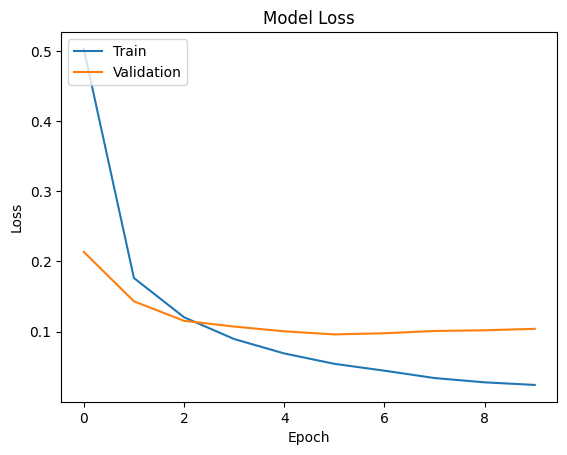

In [33]:
import matplotlib.pyplot as plt

# 繪製損失值變化圖
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


6.印出模型在測試集上的表現,accuracy需達到90%以上（20分）

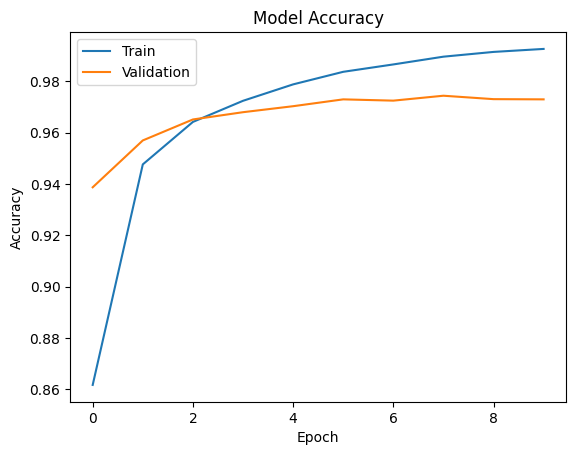

In [34]:
import matplotlib.pyplot as plt

# 繪製準確率變化圖
plt.plot(train_history.history['accuracy'])
plt.plot(train_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

7.顯示出模型預測測試集的Confusion Matrix、Precision、Recall、Accuracy（10分）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


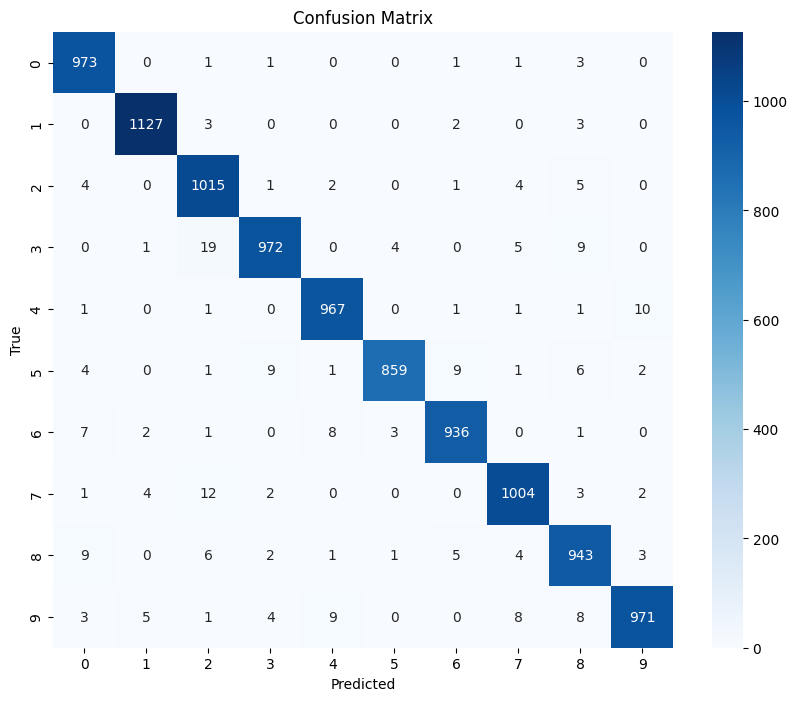

Precision: 0.9768
Recall: 0.9767
Accuracy: 0.9767


In [35]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 使用模型預測測試集
y_pred = model.predict(x_Test_normalize)  # x_Test_normalize 是你的測試數據
y_pred_classes = np.argmax(y_pred, axis=1)  # 將概率轉換為類別
y_true = np.argmax(y_TestOneHot, axis=1)  # 將真實的one-hot編碼轉換為類別

# 計算混淆矩陣
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# 顯示混淆矩陣
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# 計算 Precision, Recall 和 Accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
accuracy = accuracy_score(y_true, y_pred_classes)

# 顯示結果
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')


8.視覺化3個模型預測錯誤的資料（10分）

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


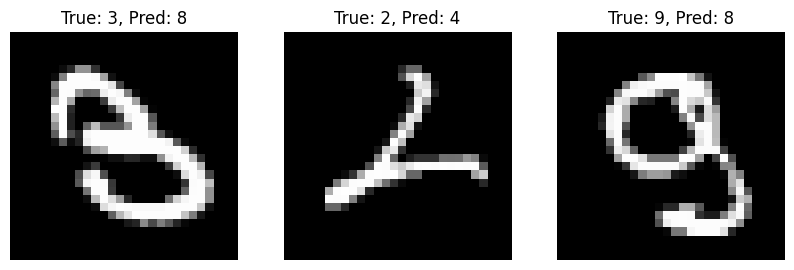

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# 模型對測試集進行預測
y_pred = model.predict(x_Test_normalize)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_TestOneHot, axis=1)

# 找出預測錯誤的樣本
errors = (y_pred_classes != y_true)
y_pred_errors = y_pred_classes[errors]
y_true_errors = y_true[errors]
x_test_errors = x_Test_normalize[errors]

# 顯示前3個預測錯誤的樣本
def display_errors(images, true_labels, pred_labels, num_errors=3):
    plt.figure(figsize=(10, 10))
    for i in range(num_errors):
        plt.subplot(1, 3, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')  # 假設是28x28的圖片
        plt.title(f'True: {true_labels[i]}, Pred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

# 顯示3個模型預測錯誤的圖片
display_errors(x_test_errors, y_true_errors, y_pred_errors, num_errors=3)
